<a href="https://colab.research.google.com/github/myriambrah/web/blob/main/Bienvenue_dans_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Projet ACT 208:** *Actuariat Contemporain*

**SUJET:**
*Tarification Auto*

**GROUPE:** *MYRIAM BRAHMI **&** MED FADHEL JAIET*


🔹 **Première partie**

**1.1** *Imports + chargement des fichiers*

In [1]:
import pandas as pd
import numpy as np

policy_train = pd.read_csv("policyTrain.csv")
claim_train  = pd.read_csv("claimTrain.csv")
policy_test  = pd.read_csv("policyTest.csv")

# dictionnaire des variables (souvent plusieurs onglets)
data_dict = pd.read_excel("dataDict.xlsx", sheet_name=None)

print("policy_train:", policy_train.shape)
print("claim_train :", claim_train.shape)
print("policy_test :", policy_test.shape)
print("Sheets in dataDict:", list(data_dict.keys()))


/tmp/ipython-input-4183140891.py:6: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  policy_test  = pd.read_csv("policyTest.csv")


policy_train: (66315, 26)
claim_train : (9465, 4)
policy_test : (33685, 26)
Sheets in dataDict: ['Feuil1']


**1.2** *Aperçu & types*

In [2]:
display(policy_train.head())
display(claim_train.head())
display(policy_test.head())

policy_train.dtypes


,id_client,id_vehicle,id_policy,pol_bonus,pol_coverage,pol_duration,pol_pay_freq,pol_usage,pol_insee_code,drv_drv2,...,vh_age,vh_cyl,vh_din,vh_fuel,vh_make,vh_model,vh_speed,vh_type,vh_value,vh_weight
0,A00000001,V01,A00000001-V01,0.5,Maxi,29,Biannual,Retired,36233,No,...,10,1587,98,Gasoline,PEUGEOT,306,182,Tourism,20700,1210
1,A00000002,V01,A00000002-V01,50.0,Maxi,3,Biannual,Retired,92073,No,...,4,2149,170,Diesel,MERCEDES BENZ,C220,229,Tourism,34250,1510
2,A00000003,V01,A00000003-V01,0.5,Maxi,2,Yearly,WorkPrivate,92026,No,...,11,1991,150,Gasoline,BMW,Z3,210,Tourism,28661,1270
3,A00000004,V01,A00000004-V01,0.5,Median2,22,Yearly,WorkPrivate,78537,Yes,...,16,1781,90,Gasoline,VOLKSWAGEN,GOLF,180,Tourism,14407,1020
4,A00000006,V01,A00000006-V01,0.5,Median1,5,Monthly,WorkPrivate,76259,No,...,14,1769,60,Diesel,PEUGEOT,205,155,Tourism,11564,850


,id_client,id_vehicle,id_claim,claim_amount
0,A00000009,V01,CL01,927.16
1,A00000026,V01,CL01,478.01
2,A00000040,V01,CL01,512.83
3,A00000070,V01,CL01,158.28
4,A00000076,V01,CL01,-991.69


,id_client,id_vehicle,id_policy,pol_bonus,pol_coverage,pol_duration,pol_pay_freq,pol_usage,pol_insee_code,drv_drv2,...,vh_age,vh_cyl,vh_din,vh_fuel,vh_make,vh_model,vh_speed,vh_type,vh_value,vh_weight
0,A00000005,V01,A00000005-V01,0.5,Maxi,16,Biannual,Retired,38544,Yes,...,11.0,1598,108,Gasoline,RENAULT,LAGUNA,195,Tourism,16770,1230
1,A00000007,V01,A00000007-V01,0.5,Maxi,5,Biannual,Retired,38547,No,...,7.0,1870,108,Diesel,RENAULT,LAGUNA,193,Tourism,22450,1350
2,A00000008,V01,A00000008-V01,0.5,Maxi,2,Biannual,Retired,37122,No,...,11.0,1595,101,Gasoline,AUDI,A4,191,Tourism,20535,1195
3,A00000010,V01,A00000010-V01,0.5,Maxi,26,Biannual,WorkPrivate,74123,Yes,...,6.0,1997,90,Diesel,PEUGEOT,PARTNER,163,Tourism,18550,1110
4,A00000012,V01,A00000012-V01,0.5,Maxi,4,Yearly,Retired,28386,No,...,5.0,1798,127,Gasoline,MAZDA,MX5,196,Tourism,22450,1080


,0
id_client,object
id_vehicle,object
id_policy,object
pol_bonus,float64
pol_coverage,object
pol_duration,int64
pol_pay_freq,object
pol_usage,object
pol_insee_code,object
drv_drv2,object


**1.3** *Vérifier la “clé” (très important)*



* Dans ce projet, l’unité de risque est généralement (id_client,  Élément id_vehicle) (un client peut avoir plusieurs véhicules).
On le vérifie :






In [3]:
print("id_client unique (train):", policy_train["id_client"].is_unique)
print("id_vehicle unique (train):", policy_train["id_vehicle"].is_unique)

# unicité du couple client–véhicule
print("Couple (id_client,id_vehicle) unique (train):",
      policy_train[["id_client","id_vehicle"]].duplicated().sum() == 0)

print("Couple (id_client,id_vehicle) unique (test):",
      policy_test[["id_client","id_vehicle"]].duplicated().sum() == 0)


id_client unique (train): False
id_vehicle unique (train): False
Couple (id_client,id_vehicle) unique (train): True
Couple (id_client,id_vehicle) unique (test): True


**1.4** *Créer la clé risk_id dans train/test/claims*

In [4]:
def make_risk_id(df):
    return df["id_client"].astype(str) + "_" + df["id_vehicle"].astype(str)

policy_train["risk_id"] = make_risk_id(policy_train)
policy_test["risk_id"]  = make_risk_id(policy_test)
claim_train["risk_id"]  = make_risk_id(claim_train)

print("risk_id unique policy_train:", policy_train["risk_id"].is_unique)
print("risk_id unique policy_test :", policy_test["risk_id"].is_unique)
print("risk_id unique claim_train :", claim_train["risk_id"].is_unique)


risk_id unique policy_train: True
risk_id unique policy_test : True
risk_id unique claim_train : False


⚠️ claim_train est non unique car plusieurs sinistres par risque.

🔹 **Deuxième étape:**

**2.1** *Comprendre les sinistres & nettoyer les montants négatifs*

In [5]:
claim_train.describe(include="all")


,id_client,id_vehicle,id_claim,claim_amount,risk_id
count,9465,9465,9465,9465.000000,9465
unique,8346,4,6,NaN,8400
top,A00033511,V01,CL01,NaN,A00033511_V01
freq,6,8992,8400,NaN,6
mean,NaN,NaN,NaN,830.555661,NaN
std,NaN,NaN,NaN,2308.157802,NaN
min,NaN,NaN,NaN,-1859.560000,NaN
25%,NaN,NaN,NaN,122.360000,NaN
50%,NaN,NaN,NaN,478.570000,NaN
75%,NaN,NaN,NaN,1200.680000,NaN


In [6]:
# on tronque à 0 : régularisations/annulations ne doivent pas “récompenser” le risque
claim_train["claim_amount_clean"] = claim_train["claim_amount"].clip(lower=0)

# combien de lignes négatives ?
neg_rate = (claim_train["claim_amount"] < 0).mean()
print("Part des sinistres avec montant négatif:", round(100*neg_rate, 2), "%")


Part des sinistres avec montant négatif: 8.68 %


**2.2** *Analyse des valeurs manquantes (NA) dans la base **policy_train***

In [7]:
# nous travaillons sur policy_train (X brutes)
na_rate = policy_train.isna().mean().sort_values(ascending=False) * 100
na_rate


,0
drv_sex2,67.428184
id_vehicle,0.000000
id_client,0.000000
pol_bonus,0.000000
pol_coverage,0.000000
pol_duration,0.000000
pol_pay_freq,0.000000
pol_usage,0.000000
pol_insee_code,0.000000
drv_drv2,0.000000




* **Visualisation simple des NA**



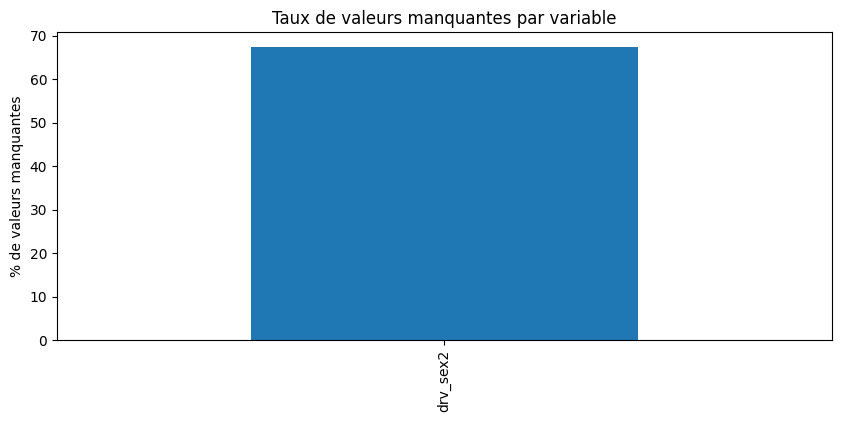

In [8]:
import matplotlib.pyplot as plt

na_rate[na_rate > 0].plot(kind="bar", figsize=(10,4))
plt.ylabel("% de valeurs manquantes")
plt.title("Taux de valeurs manquantes par variable")
plt.show()


L’analyse des valeurs manquantes met en évidence une seule variable présentant un taux élevé de valeurs manquantes : la variable drv_sex2. Ces valeurs manquantes correspondent à l’absence de conducteur secondaire et constituent une information pertinente d’un point de vue métier. Aucune autre variable explicative ne présente de valeurs manquantes.

**2.3** *Analyse de la corrélation entre les variables*


*   **Séparer variables numériques et catégorielles**



In [9]:
# Séparation des types
num_cols = policy_train.select_dtypes(exclude="object").columns.tolist()
cat_cols = policy_train.select_dtypes(include="object").columns.tolist()

print("Nb variables numériques :", len(num_cols))
print("Variables numériques :", num_cols)

print("\nNb variables catégorielles :", len(cat_cols))
print("Variables catégorielles :", cat_cols)


Nb variables numériques : 12
Variables numériques : ['pol_bonus', 'pol_duration', 'drv_age1', 'drv_age2', 'drv_age_lic1', 'drv_age_lic2', 'vh_age', 'vh_cyl', 'vh_din', 'vh_speed', 'vh_value', 'vh_weight']

Nb variables catégorielles : 15
Variables catégorielles : ['id_client', 'id_vehicle', 'id_policy', 'pol_coverage', 'pol_pay_freq', 'pol_usage', 'pol_insee_code', 'drv_drv2', 'drv_sex1', 'drv_sex2', 'vh_fuel', 'vh_make', 'vh_model', 'vh_type', 'risk_id']




*   **Matrice de corrélation (numérique–numérique)**
  -Nous utilisons Pearson (classique) et nous visualisons



In [10]:
corr_matrix = policy_train[num_cols].corr(method="pearson")
corr_matrix


,pol_bonus,pol_duration,drv_age1,drv_age2,drv_age_lic1,drv_age_lic2,vh_age,vh_cyl,vh_din,vh_speed,vh_value,vh_weight
pol_bonus,1.000000,-0.017165,-0.035256,-0.002941,-0.015055,-0.001419,0.004483,0.006629,0.001892,-0.002453,0.001768,0.002186
pol_duration,-0.017165,1.000000,0.254579,0.002457,0.390494,0.025147,0.022672,-0.087872,-0.070776,-0.021631,-0.090857,-0.023061
drv_age1,-0.035256,0.254579,1.000000,0.052453,0.587647,0.069322,0.062001,-0.039996,-0.038937,-0.033511,-0.046089,-0.020053
drv_age2,-0.002941,0.002457,0.052453,1.000000,0.104808,0.824802,-0.101528,0.017032,0.074406,0.086314,0.073250,0.100452
drv_age_lic1,-0.015055,0.390494,0.587647,0.104808,1.000000,0.130396,0.067752,-0.017907,-0.011826,-0.025059,-0.019073,-0.000041
drv_age_lic2,-0.001419,0.025147,0.069322,0.824802,0.130396,1.000000,-0.082976,0.019231,0.065347,0.070899,0.065230,0.083711
vh_age,0.004483,0.022672,0.062001,-0.101528,0.067752,-0.082976,1.000000,-0.011532,-0.318265,-0.420549,-0.298233,-0.279121
vh_cyl,0.006629,-0.087872,-0.039996,0.017032,-0.017907,0.019231,-0.011532,1.000000,0.716481,0.409491,0.766159,0.397859
vh_din,0.001892,-0.070776,-0.038937,0.074406,-0.011826,0.065347,-0.318265,0.716481,1.000000,0.813940,0.886843,0.560832
vh_speed,-0.002453,-0.021631,-0.033511,0.086314,-0.025059,0.070899,-0.420549,0.409491,0.813940,1.000000,0.643480,0.525978




*   **Heatmap de corrélation**



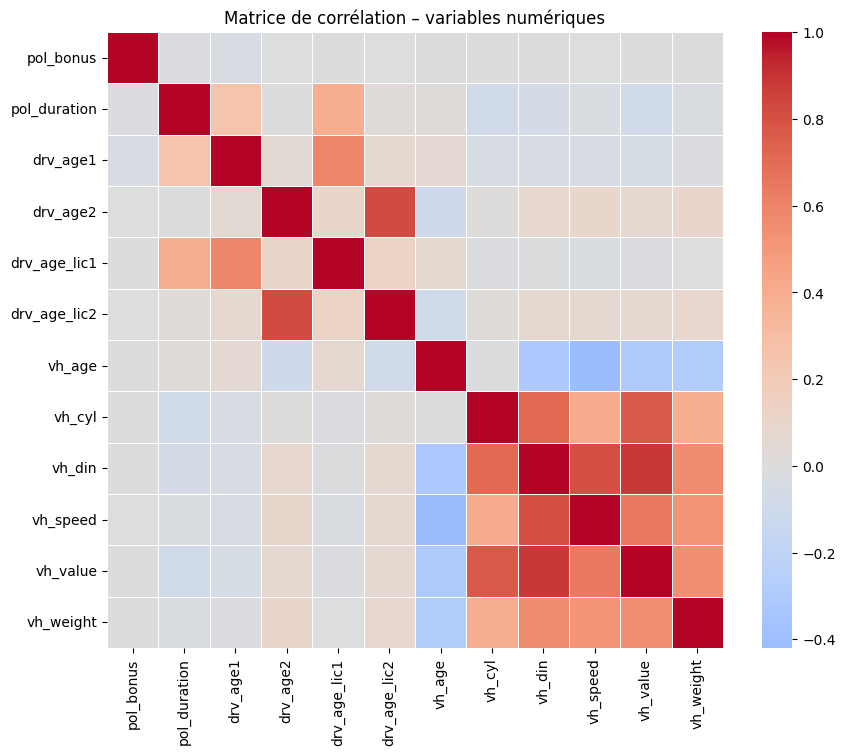

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,8))
sns.heatmap(
    corr_matrix,
    cmap="coolwarm",
    center=0,
    square=True,
    linewidths=0.5
)
plt.title("Matrice de corrélation – variables numériques")
plt.show()


On distingue deux blocs très clairs :

🧍 Bloc “conducteurs”
drv_age2 ↔ drv_age_lic2 : corr ≈ 0.82
drv_age1 ↔ drv_age_lic1 : corrélation visible (moins forte mais logique)
👉 Interprétation métier :
Plus un conducteur est âgé, plus il a de l’ancienneté de permis donc la corrélation est attendue et non problématique
🚗 Bloc “véhicule”
Très fortes corrélations entre :
vh_din ↔ vh_value : 0.89
vh_din ↔ vh_speed : 0.81
vh_cyl ↔ vh_value : 0.77
vh_weight ↔ vh_value : forte
👉 Interprétation métier :
Véhicules plus puissants sont les plus chers,plus lourds, plus rapides
Redondance technique et naturelle



*   **Zoom sur les corrélations élevées**



In [12]:
# Extraire les corrélations fortes (hors diagonale)
corr_pairs = (
    corr_matrix.abs()
    .unstack()
    .reset_index()
    .rename(columns={"level_0":"var1", "level_1":"var2", 0:"corr"})
)

corr_pairs = corr_pairs[corr_pairs["var1"] != corr_pairs["var2"]]
corr_pairs = corr_pairs.sort_values("corr", ascending=False)

corr_pairs.head(10)


,var1,var2,corr
106,vh_din,vh_value,0.886843
128,vh_value,vh_din,0.886843
41,drv_age2,drv_age_lic2,0.824802
63,drv_age_lic2,drv_age2,0.824802
105,vh_din,vh_speed,0.813940
116,vh_speed,vh_din,0.813940
127,vh_value,vh_cyl,0.766159
94,vh_cyl,vh_value,0.766159
92,vh_cyl,vh_din,0.716481
103,vh_din,vh_cyl,0.716481


L’analyse de la corrélation entre les variables numériques met en évidence plusieurs corrélations élevées, notamment entre les caractéristiques techniques du véhicule (puissance, cylindrée, valeur, vitesse) ainsi qu’entre l’âge des conducteurs et leur ancienneté de permis. Ces corrélations s’expliquent par des liens métier naturels et ne traduisent pas des anomalies dans les données. Aucune variable n’a été supprimée à ce stade ; les modèles non linéaires utilisés par la suite sont capables de gérer ces redondances.

**2.3** *Analyse des valeurs aberrantes*



*  **Sélection des variables numériques pertinentes**



In [13]:
num_cols = policy_train.select_dtypes(exclude="object").columns.tolist()
num_cols


['pol_bonus',
 'pol_duration',
 'drv_age1',
 'drv_age2',
 'drv_age_lic1',
 'drv_age_lic2',
 'vh_age',
 'vh_cyl',
 'vh_din',
 'vh_speed',
 'vh_value',
 'vh_weight']



*   **Statistiques descriptives (premier filtre)**



In [14]:
policy_train[num_cols].describe(percentiles=[.01, .05, .5, .95, .99])


,pol_bonus,pol_duration,drv_age1,drv_age2,drv_age_lic1,drv_age_lic2,vh_age,vh_cyl,vh_din,vh_speed,vh_value,vh_weight
count,66315.000000,66315.000000,66315.000000,66315.000000,66315.000000,66315.000000,66315.000000,66315.000000,66315.000000,66315.000000,66315.000000,66315.000000
mean,2.347795,11.089392,57.892965,15.237865,32.303777,8.913338,9.451482,1640.399442,91.291382,170.797949,18005.581512,1127.075488
std,9.848027,8.558427,23.437100,23.794441,13.523169,16.880361,6.940486,454.754460,34.051242,23.217267,8562.663999,355.593516
min,0.500000,1.000000,19.000000,0.000000,1.000000,0.000000,1.000000,0.000000,13.000000,25.000000,0.000000,0.000000
1%,0.500000,1.000000,24.000000,0.000000,4.000000,0.000000,1.000000,602.000000,30.000000,110.000000,3499.000000,0.000000
5%,0.500000,1.000000,31.000000,0.000000,10.000000,0.000000,1.000000,998.000000,52.000000,134.000000,8522.000000,700.000000
50%,0.500000,9.000000,55.000000,0.000000,32.000000,0.000000,8.000000,1587.000000,87.000000,170.000000,16200.000000,1125.000000
95%,0.943000,27.000000,84.000000,65.000000,54.000000,43.000000,22.000000,2461.000000,150.000000,208.000000,33200.000000,1648.300000
99%,50.000000,31.000000,163.000000,78.000000,61.000000,58.000000,33.000000,2987.000000,207.000000,231.000000,46790.000000,2030.000000
max,216.000000,41.000000,194.000000,99.000000,111.000000,111.000000,65.000000,6997.000000,555.000000,310.000000,155498.000000,3500.000000




*   **Boxplots (vision claire des outliers)**


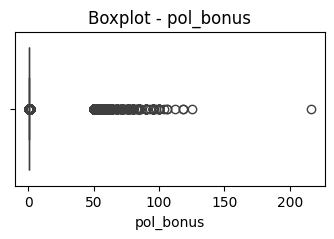

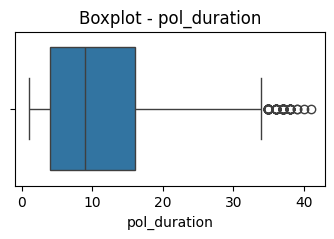

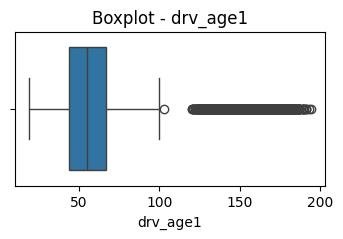

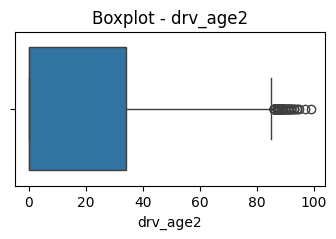

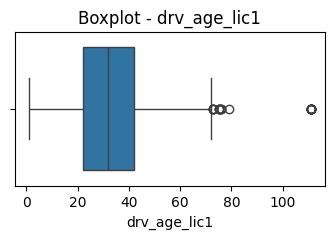

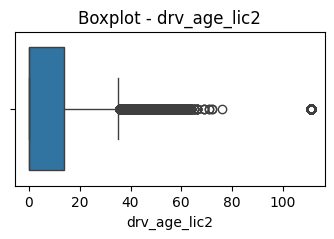

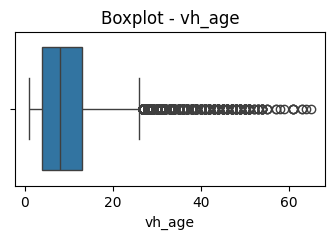

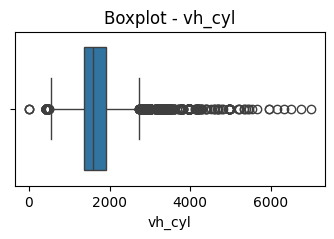

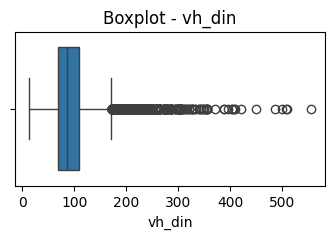

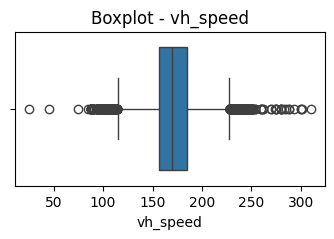

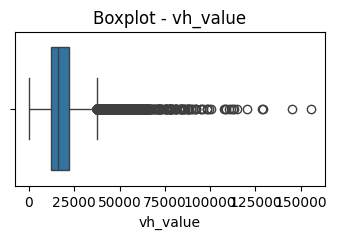

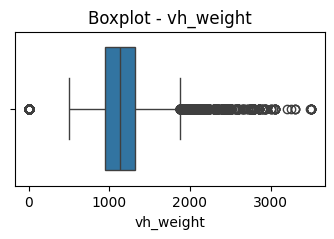

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

for col in num_cols:
    plt.figure(figsize=(4,2))
    sns.boxplot(x=policy_train[col])
    plt.title(f"Boxplot - {col}")
    plt.show()


- **Détection “technique” via l’IQR**


In [16]:
outlier_summary = []

for col in num_cols:
    q1 = policy_train[col].quantile(0.25)
    q3 = policy_train[col].quantile(0.75)
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr

    out_rate = ((policy_train[col] < lower) | (policy_train[col] > upper)).mean()

    outlier_summary.append({
        "variable": col,
        "outlier_rate_%": round(100*out_rate, 2),
        "min": policy_train[col].min(),
        "max": policy_train[col].max()
    })

outlier_df = pd.DataFrame(outlier_summary).sort_values("outlier_rate_%", ascending=False)
outlier_df


,variable,outlier_rate_%,min,max
0,pol_bonus,22.85,0.5,216.0
5,drv_age_lic2,8.93,0.0,111.0
11,vh_weight,5.28,0.0,3500.0
2,drv_age1,3.37,19.0,194.0
9,vh_speed,2.80,25.0,310.0
10,vh_value,2.80,0.0,155498.0
7,vh_cyl,2.57,0.0,6997.0
8,vh_din,2.39,13.0,555.0
6,vh_age,2.18,1.0,65.0
1,pol_duration,0.16,1.0,41.0


L’analyse des valeurs aberrantes met en évidence de nombreuses observations extrêmes au sens statistique, notamment pour les variables décrivant les caractéristiques du véhicule et le bonus/malus. Ces valeurs correspondent à des profils rares mais plausibles et ont été conservées. En revanche, certaines incohérences ont été identifiées pour les variables d’âge des conducteurs et d’ancienneté de permis, suggérant des erreurs de saisie. Ces cas feront l’objet d’un traitement spécifique afin de garantir la cohérence des données.

**2.4** *Traitement des valeurs aberrantes*

- **Règles de traitement**
✅ Règle A — Âges & ancienneté permis (corriger les incohérences)
âge conducteur ∈ [18, 100]
ancienneté permis ∈ [0, âge conducteur − 18]
sinon, capping simple à 80 ans
✅ Règle B — Variables véhicule
Pour : vh_value, vh_din, vh_speed, vh_cyl, vh_weight
✅ Règle C — Bonus / durée contrat
pol_bonus : très asymétrique → capping 99e percentile
pol_duration : pas de traitement nécessaire

- **Implémentation — correction des âges**

In [17]:
# Copie de travail
policy_train_clean = policy_train.copy()

# Capping âges conducteurs
policy_train_clean["drv_age1"] = policy_train_clean["drv_age1"].clip(lower=18, upper=100)
policy_train_clean["drv_age2"] = policy_train_clean["drv_age2"].clip(lower=18, upper=100)

# Capping ancienneté permis
policy_train_clean["drv_age_lic1"] = policy_train_clean["drv_age_lic1"].clip(lower=0, upper=80)
policy_train_clean["drv_age_lic2"] = policy_train_clean["drv_age_lic2"].clip(lower=0, upper=80)


- **Implémentation — winsorisation des variables véhicule & bonus**

In [18]:
# Variables à winsoriser
cap_cols = ["vh_value", "vh_din", "vh_speed", "vh_cyl", "vh_weight", "pol_bonus"]

cap_thresholds = {}

for col in cap_cols:
    cap = policy_train_clean[col].quantile(0.99)
    cap_thresholds[col] = cap
    policy_train_clean[col] = policy_train_clean[col].clip(upper=cap)

cap_thresholds


{'vh_value': np.float64(46790.0),
 'vh_din': np.float64(207.0),
 'vh_speed': np.float64(231.0),
 'vh_cyl': np.float64(2987.0),
 'vh_weight': np.float64(2030.0),
 'pol_bonus': np.float64(50.0)}

- **Vérification post-traitement**

In [19]:
policy_train_clean[num_cols].describe(percentiles=[.01,.05,.5,.95,.99])


,pol_bonus,pol_duration,drv_age1,drv_age2,drv_age_lic1,drv_age_lic2,vh_age,vh_cyl,vh_din,vh_speed,vh_value,vh_weight
count,66315.000000,66315.000000,66315.000000,66315.000000,66315.000000,66315.000000,66315.000000,66315.000000,66315.000000,66315.000000,66315.000000,66315.000000
mean,2.213014,11.089392,56.057513,27.374938,32.295363,8.670723,9.451482,1636.022544,90.909809,170.672744,17894.043670,1124.117771
std,8.945810,8.558427,16.853347,16.353700,13.483786,15.584373,6.940486,435.100926,32.215387,22.835214,7984.855393,345.438878
min,0.500000,1.000000,19.000000,18.000000,1.000000,0.000000,1.000000,0.000000,13.000000,25.000000,0.000000,0.000000
1%,0.500000,1.000000,24.000000,18.000000,4.000000,0.000000,1.000000,602.000000,30.000000,110.000000,3499.000000,0.000000
5%,0.500000,1.000000,31.000000,18.000000,10.000000,0.000000,1.000000,998.000000,52.000000,134.000000,8522.000000,700.000000
50%,0.500000,9.000000,55.000000,18.000000,32.000000,0.000000,8.000000,1587.000000,87.000000,170.000000,16200.000000,1125.000000
95%,0.943000,27.000000,84.000000,65.000000,54.000000,43.000000,22.000000,2461.000000,150.000000,208.000000,33200.000000,1648.300000
99%,50.000000,31.000000,100.000000,78.000000,61.000000,58.000000,33.000000,2987.000000,207.000000,231.000000,46790.000000,2030.000000
max,50.000000,41.000000,100.000000,99.000000,80.000000,80.000000,65.000000,2987.000000,207.000000,231.000000,46790.000000,2030.000000


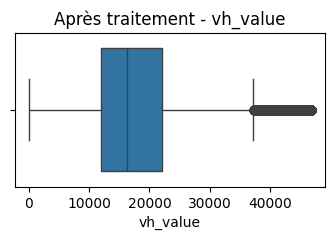

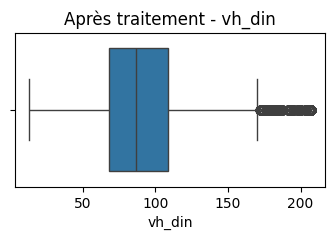

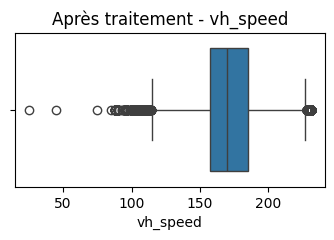

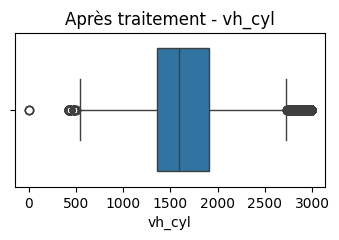

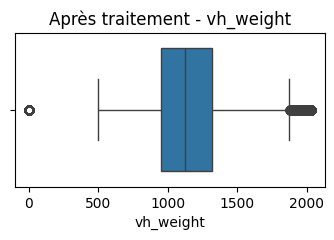

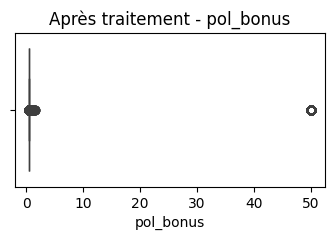

In [20]:
# Reboxplot rapide pour vérifier
import seaborn as sns
import matplotlib.pyplot as plt

for col in cap_cols:
    plt.figure(figsize=(4,2))
    sns.boxplot(x=policy_train_clean[col])
    plt.title(f"Après traitement - {col}")
    plt.show()


Les valeurs aberrantes ont été traitées de manière différenciée selon leur nature. Les incohérences manifestes concernant les âges des conducteurs et l’ancienneté du permis ont été corrigées par capping à des bornes réalistes. Les variables décrivant les caractéristiques des véhicules et le bonus/malus présentent des valeurs extrêmes plausibles ; celles-ci ont été conservées mais leur influence a été limitée par une winsorisation au 99e percentile. Les seuils ont été déterminés sur la base d’apprentissage et appliqués de manière identique à la base de test.

🔹 **Troisième partie**

 **Construction des variables cibles (fréquence & sévérité)**



 **3.1**  *Préparer la base des sinistres*

In [21]:
# Vérification rapide
claim_train.describe(include="all")


,id_client,id_vehicle,id_claim,claim_amount,risk_id,claim_amount_clean
count,9465,9465,9465,9465.000000,9465,9465.000000
unique,8346,4,6,NaN,8400,NaN
top,A00033511,V01,CL01,NaN,A00033511_V01,NaN
freq,6,8992,8400,NaN,6,NaN
mean,NaN,NaN,NaN,830.555661,NaN,875.040788
std,NaN,NaN,NaN,2308.157802,NaN,2285.291552
min,NaN,NaN,NaN,-1859.560000,NaN,0.000000
25%,NaN,NaN,NaN,122.360000,NaN,122.360000
50%,NaN,NaN,NaN,478.570000,NaN,478.570000
75%,NaN,NaN,NaN,1200.680000,NaN,1200.680000


- Nettoyage des montants (règle actuarielle standard)

In [22]:
# Montants négatifs = régularisations → tronqués à 0
claim_train["claim_amount_clean"] = claim_train["claim_amount"].clip(lower=0)

print("Part montants négatifs (%):",
      round(100*(claim_train["claim_amount"] < 0).mean(), 2))


Part montants négatifs (%): 8.68


**3.2** *Agrégation des sinistres au niveau du risque*

Agrégation par risk_id (client–véhicule).

In [23]:
targets = (
    claim_train
    .groupby("risk_id")
    .agg(
        hasClaim=("claim_amount_clean", lambda x: int((x > 0).any())),
        cost=("claim_amount_clean", "sum")
    )
    .reset_index()
)

targets.head()


,risk_id,hasClaim,cost
0,A00000009_V01,1,927.16
1,A00000026_V01,1,478.01
2,A00000040_V01,1,512.83
3,A00000070_V01,1,158.28
4,A00000076_V01,0,0.00


**3.3** *Fusion avec la base explicative nettoyée*

In [24]:
train = policy_train_clean.merge(targets, on="risk_id", how="left")

# Assurés sans sinistre
train["hasClaim"] = train["hasClaim"].fillna(0).astype(int)
train["cost"] = train["cost"].fillna(0)

print("Shape train final :", train.shape)


Shape train final : (66315, 29)


**3.4** *Contrôles actuariels indispensables*

**Fréquence Moyenne**

In [25]:
freq_mean = train["hasClaim"].mean()
print("Fréquence moyenne :", round(freq_mean, 4))


Fréquence moyenne : 0.1122


**Sévéritémoyenne conditionnelle**

In [26]:
sev_mean = train.loc[train["hasClaim"] == 1, "cost"].mean()
print("Sévérité moyenne conditionnelle :", round(sev_mean, 2))


Sévérité moyenne conditionnelle : 1113.36


**Prime pure moyenne observée**

In [27]:

pp_obs = train["cost"].mean()
print("Prime pure moyenne observée :", round(pp_obs, 2))

Prime pure moyenne observée : 124.89


**3.5** *Vérifications de cohérence*

In [28]:
# Aucun coût positif sans sinistre
print("Incohérences (cost>0 & hasClaim=0) :",
      ((train["cost"] > 0) & (train["hasClaim"] == 0)).sum())

# Distribution des coûts
train["cost"].describe(percentiles=[.5,.75,.9,.95,.99])


Incohérences (cost>0 & hasClaim=0) : 0


,cost
count,66315.000000
mean,124.892725
std,929.102399
min,0.000000
50%,0.000000
75%,0.000000
90%,110.980000
95%,780.079000
99%,2683.760000
max,141828.260000


Les variables cibles ont été construites à partir de la base de sinistres. Un indicateur binaire de survenance de sinistre a été défini au niveau du couple client–véhicule. Le coût annuel a été calculé comme la somme des montants d’indemnisation positifs sur la période observée. Les montants négatifs, correspondant à des régularisations comptables, ont été tronqués à zéro afin de ne pas biaiser l’estimation de la prime pure.

🔹 Quatrième Partie

**Feature engineering & préparation pour les modèles**

**4.1** *Définir X et les cibles*

In [29]:
# Cibles
y_classif = train["hasClaim"]
y_cost = train["cost"]

# Colonnes techniques à exclure
id_cols = ["id_client", "id_vehicle", "id_policy", "risk_id"]

# Variables explicatives
X = train.drop(columns=id_cols + ["hasClaim", "cost"])

print("X shape :", X.shape)
print("y_classif shape :", y_classif.shape)


X shape : (66315, 23)
y_classif shape : (66315,)


**4.2** *Séparer variables numériques / catégorielles**

In [30]:
num_cols = X.select_dtypes(exclude="object").columns.tolist()
cat_cols = X.select_dtypes(include="object").columns.tolist()

print("Nb numériques :", len(num_cols))
print("Numériques :", num_cols)

print("\nNb catégorielles :", len(cat_cols))
print("Catégorielles :", cat_cols)


Nb numériques : 12
Numériques : ['pol_bonus', 'pol_duration', 'drv_age1', 'drv_age2', 'drv_age_lic1', 'drv_age_lic2', 'vh_age', 'vh_cyl', 'vh_din', 'vh_speed', 'vh_value', 'vh_weight']

Nb catégorielles : 11
Catégorielles : ['pol_coverage', 'pol_pay_freq', 'pol_usage', 'pol_insee_code', 'drv_drv2', 'drv_sex1', 'drv_sex2', 'vh_fuel', 'vh_make', 'vh_model', 'vh_type']


**4.3**  *Gestion des valeurs manquantes*

In [31]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

# Pipeline numériques
num_pipe = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median"))
])

# Pipeline catégorielles
cat_pipe = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

# Preprocessor global
preprocessor = ColumnTransformer(
    transformers=[
        ("num", num_pipe, num_cols),
        ("cat", cat_pipe, cat_cols)
    ]
)


Les variables explicatives ont été préparées à l’aide d’un pipeline de prétraitement. Les variables numériques ont été imputées par la médiane afin de limiter l’influence des valeurs extrêmes, tandis que les variables catégorielles ont été imputées par la modalité la plus fréquente et encodées par one-hot encoding. Ce prétraitement est intégré dans un pipeline afin de garantir la reproductibilité et d’éviter toute fuite d’information.

🔹 Cinquième Partie

**Modèle de probabilité (baseline logistique)**

**5.1** *Split train / validation (classification)*

In [32]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(
    X,
    y_classif,
    test_size=0.2,
    random_state=42,
    stratify=y_classif
)

print("X_train :", X_train.shape)
print("X_valid :", X_valid.shape)
print("Fréquence train :", y_train.mean())
print("Fréquence valid :", y_valid.mean())


X_train : (53052, 23)
X_valid : (13263, 23)
Fréquence train : 0.11217296237653623
Fréquence valid : 0.11219181180728342


**5.2** *Pipeline logistique (baseline)*

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

logit_model = Pipeline(steps=[
    ("preprocess", preprocessor),
    ("model", LogisticRegression(
        max_iter=1000,
        solver="lbfgs"
    ))
])


**5.3** *Entraînement du modèle*

In [34]:
logit_model.fit(X_train, y_train)


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  ['pol_bonus', 'pol_duration',
                                                   'drv_age1', 'drv_age2',
                                                   'drv_age_lic1',
                                                   'drv_age_lic2', 'vh_age',
                                                   'vh_cyl', 'vh_din',
                                                   'vh_speed', 'vh_value',
                                                   'vh_weight']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['pol_coverage',
                                                   'pol_pay_freq', 'pol_usage',
                                                   'pol_insee_code', 'drv_drv2',
                                                   'drv_sex1', 'drv_sex2',
                                                   'vh_fuel', 'vh_make',
                                                   'vh_model', 'vh_type'])])),
                ('model', LogisticRegression(max_iter=1000))])

**5.4** *Prédictions & AUC*

AUC logistique (baseline) : 0.6167


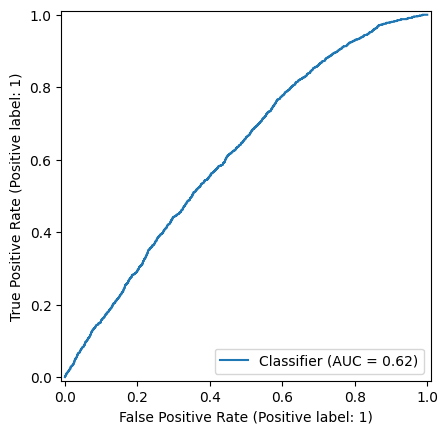

In [35]:
from sklearn.metrics import roc_auc_score, RocCurveDisplay

# Probabilités prédites
y_valid_pred = logit_model.predict_proba(X_valid)[:, 1]

# AUC
auc_logit = roc_auc_score(y_valid, y_valid_pred)
print("AUC logistique (baseline) :", round(auc_logit, 4))

# Courbe ROC
RocCurveDisplay.from_predictions(y_valid, y_valid_pred)


🔹 Sixième Partie

**Modèles ML avancés**

**6.1** *CatBoost: Préparer les indices des variables catégorielles*

In [36]:
# Indices des variables catégorielles dans X
cat_features = [X.columns.get_loc(col) for col in cat_cols]
cat_features


[1, 3, 4, 5, 6, 9, 10, 16, 17, 18, 20]

**6.2** *Modèle CatBoost (classification)*

In [37]:
!pip -q install catboost


In [38]:
import sys, subprocess, pkgutil
if not pkgutil.find_loader("catboost"):
    subprocess.check_call([sys.executable, "-m", "pip", "-q", "install", "catboost"])


/tmp/ipython-input-2547559602.py:2: DeprecationWarning: 'pkgutil.find_loader' is deprecated and slated for removal in Python 3.14; use importlib.util.find_spec() instead
  if not pkgutil.find_loader("catboost"):


In [39]:
from catboost import CatBoostClassifier


**6.3** *Entraînement avec validation*

In [47]:
from catboost import CatBoostClassifier
import numpy as np
import pandas as pd

# 1) Recalculer cat_cols / num_cols SUR X_train (important)
cat_cols_cb = X_train.select_dtypes(include="object").columns.tolist()
num_cols_cb = X_train.select_dtypes(exclude="object").columns.tolist()

# 2) Créer des copies
X_train_cb = X_train.copy()
X_valid_cb = X_valid.copy()

# 3) Forcer les catégorielles en string + remplacer NaN
for c in cat_cols_cb:
    X_train_cb[c] = X_train_cb[c].fillna("Missing").astype(str)
    X_valid_cb[c] = X_valid_cb[c].fillna("Missing").astype(str)

# 4) Forcer les numériques en float + remplacer inf/-inf
for c in num_cols_cb:
    X_train_cb[c] = pd.to_numeric(X_train_cb[c], errors="coerce")
    X_valid_cb[c] = pd.to_numeric(X_valid_cb[c], errors="coerce")
    X_train_cb[c] = X_train_cb[c].replace([np.inf, -np.inf], np.nan)
    X_valid_cb[c] = X_valid_cb[c].replace([np.inf, -np.inf], np.nan)

# Imputation simple des numériques (CatBoost peut gérer NaN, mais on sécurise)
for c in num_cols_cb:
    med = X_train_cb[c].median()
    X_train_cb[c] = X_train_cb[c].fillna(med)
    X_valid_cb[c] = X_valid_cb[c].fillna(med)

# 5) Recalculer les indices catégoriels (sur X_train_cb)
cat_features_cb = [X_train_cb.columns.get_loc(c) for c in cat_cols_cb]

# 6) Vérifs rapides
print("Nb cat:", len(cat_cols_cb), "Nb num:", len(num_cols_cb))
print("NaN restants dans cat train:", X_train_cb[cat_cols_cb].isna().sum().sum())
print("NaN restants dans num train:", X_train_cb[num_cols_cb].isna().sum().sum())

# 7) Modèle
cat_model = CatBoostClassifier(
    iterations=600,
    depth=6,
    learning_rate=0.05,
    loss_function="Logloss",
    eval_metric="AUC",
    random_seed=42,
    verbose=100
)

# 8) Fit
cat_model.fit(
    X_train_cb,
    y_train,
    cat_features=cat_features_cb,
    eval_set=(X_valid_cb, y_valid),
    use_best_model=True
)


Nb cat: 11 Nb num: 12
NaN restants dans cat train: 0
NaN restants dans num train: 0
0:	test: 0.5377469	best: 0.5377469 (0)	total: 249ms	remaining: 2m 28s
100:	test: 0.6270720	best: 0.6279949 (43)	total: 16.1s	remaining: 1m 19s
200:	test: 0.6273254	best: 0.6279949 (43)	total: 29s	remaining: 57.5s
300:	test: 0.6272415	best: 0.6279949 (43)	total: 43s	remaining: 42.7s
400:	test: 0.6277595	best: 0.6283709 (338)	total: 1m 2s	remaining: 31.1s
500:	test: 0.6281152	best: 0.6285161 (482)	total: 1m 17s	remaining: 15.3s
599:	test: 0.6263972	best: 0.6285161 (482)	total: 1m 31s	remaining: 0us

bestTest = 0.6285160834
bestIteration = 482

Shrink model to first 483 iterations.


AUC CatBoost : 0.6285


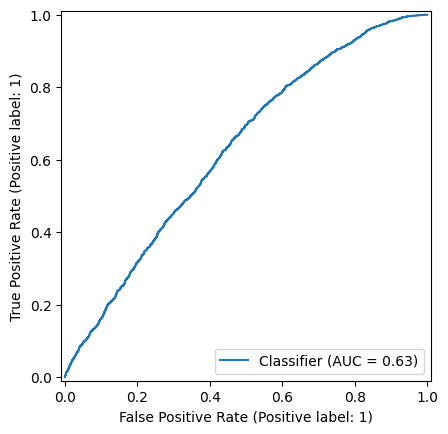

In [48]:
from sklearn.metrics import roc_auc_score, RocCurveDisplay

y_valid_pred_cb = cat_model.predict_proba(X_valid_cb)[:, 1]
auc_cb = roc_auc_score(y_valid, y_valid_pred_cb)
print("AUC CatBoost :", round(auc_cb, 4))

RocCurveDisplay.from_predictions(y_valid, y_valid_pred_cb)


Le modèle CatBoostClassifier améliore la performance prédictive par rapport au modèle logistique de référence, avec une AUC passant d’environ 0.62 à 0.63. Cette amélioration s’explique par la capacité du modèle à capturer des relations non linéaires et des interactions complexes entre les variables explicatives. Le modèle CatBoost a ainsi été retenu pour l’estimation finale de la probabilité de sinistre.

🔹 Septième Partie

**Modèle de sévérité (coût | sinistre)**

🎯 Objectifs
Modéliser le coût conditionnel sachant qu’il y a sinistre
Comparer :
un baseline simple (régression linéaire)
un modèle ML avancé (CatBoostRegressor)
Évaluer via MAE (Mean Absolute Error)
Retenir le meilleur modèle de sévérité

**7.1** *Définir la population sinistrée*

In [49]:
# Sous-échantillon des sinistrés
train_sev = train[train["hasClaim"] == 1].copy()

print("Nb sinistrés :", train_sev.shape[0])
print("Coût moyen :", round(train_sev["cost"].mean(), 2))
print("Coût médian :", round(train_sev["cost"].median(), 2))


Nb sinistrés : 7439
Coût moyen : 1113.36
Coût médian : 641.54


**7.2** *Définir X et y pour la sévérité*

In [50]:
# Variables explicatives (mêmes X que précédemment)
X_sev = train_sev[X.columns]

# Cible sévérité
y_sev = train_sev["cost"]

print(X_sev.shape, y_sev.shape)


(7439, 23) (7439,)


**7.3** *Split train / validation (sévérité)*

In [51]:
from sklearn.model_selection import train_test_split

X_train_sev, X_valid_sev, y_train_sev, y_valid_sev = train_test_split(
    X_sev,
    y_sev,
    test_size=0.2,
    random_state=42
)


**7.4** *Baseline sévérité : régression linéaire*

In [52]:
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error

sev_model_baseline = Pipeline(steps=[
    ("preprocess", preprocessor),
    ("model", LinearRegression())
])

sev_model_baseline.fit(X_train_sev, y_train_sev)

# Prédictions
y_valid_pred_lin = sev_model_baseline.predict(X_valid_sev)

# MAE
mae_lin = mean_absolute_error(y_valid_sev, y_valid_pred_lin)
print("MAE sévérité (baseline) :", round(mae_lin, 2))


MAE sévérité (baseline) : 1109.91


**7.5** *Modèle ML avancé : CatBoostRegressor*

In [53]:
from catboost import CatBoostRegressor
import numpy as np

# Copies CatBoost-safe
X_train_sev_cb = X_train_sev.copy()
X_valid_sev_cb = X_valid_sev.copy()

# Catégorielles → string + Missing
for c in cat_cols:
    X_train_sev_cb[c] = X_train_sev_cb[c].fillna("Missing").astype(str)
    X_valid_sev_cb[c] = X_valid_sev_cb[c].fillna("Missing").astype(str)

# Numériques → float + sécurité
for c in num_cols:
    X_train_sev_cb[c] = pd.to_numeric(X_train_sev_cb[c], errors="coerce")
    X_valid_sev_cb[c] = pd.to_numeric(X_valid_sev_cb[c], errors="coerce")

# Indices cat
cat_features_sev = [X_train_sev_cb.columns.get_loc(c) for c in cat_cols]


In [54]:
cat_sev_model = CatBoostRegressor(
    iterations=800,
    depth=6,
    learning_rate=0.05,
    loss_function="RMSE",
    random_seed=42,
    verbose=100
)

cat_sev_model.fit(
    X_train_sev_cb,
    y_train_sev,
    cat_features=cat_features_sev,
    eval_set=(X_valid_sev_cb, y_valid_sev),
    use_best_model=True
)


0:	learn: 2533.9972233	test: 2695.2967084	best: 2695.2967084 (0)	total: 15ms	remaining: 12s
100:	learn: 2115.4875263	test: 2697.6576605	best: 2695.2967084 (0)	total: 2.7s	remaining: 18.7s
200:	learn: 1884.6942011	test: 2693.8662207	best: 2693.4952056 (190)	total: 4.08s	remaining: 12.2s
300:	learn: 1743.4100963	test: 2692.6503290	best: 2692.3915449 (264)	total: 5.59s	remaining: 9.27s
400:	learn: 1663.9229533	test: 2691.4891659	best: 2691.4080288 (396)	total: 7.25s	remaining: 7.21s
500:	learn: 1605.2858059	test: 2691.1889176	best: 2690.1748027 (418)	total: 10.8s	remaining: 6.44s
600:	learn: 1558.4352886	test: 2690.5244469	best: 2690.0736013 (555)	total: 14.5s	remaining: 4.8s
700:	learn: 1512.2542922	test: 2689.1468170	best: 2688.8842276 (694)	total: 17.3s	remaining: 2.44s
799:	learn: 1444.9626154	test: 2688.7348150	best: 2688.3147653 (787)	total: 20.2s	remaining: 0us

bestTest = 2688.314765
bestIteration = 787

Shrink model to first 788 iterations.


In [55]:


y_valid_pred_cb = cat_sev_model.predict(X_valid_sev_cb)
mae_cb = mean_absolute_error(y_valid_sev, y_valid_pred_cb)

print("MAE sévérité (CatBoost) :", round(mae_cb, 2))


MAE sévérité (CatBoost) : 902.49


La sévérité des sinistres a été modélisée conditionnellement à la survenance d’un sinistre. Un modèle de régression linéaire a été estimé à titre de référence, puis comparé à un modèle CatBoostRegressor. La performance a été évaluée à l’aide de l’erreur absolue moyenne (MAE) sur un échantillon de validation. Le modèle CatBoost présente une meilleure capacité prédictive et a été retenu pour l’estimation finale de la sévérité.

🔹 Huitième Partie

**Prime pure & prédictions finales (policyTest)**

🎯 Objectifs
Prédire la probabilité de sinistre sur policyTest
Prédire la sévérité conditionnelle
Calculer la prime pure individuelle
Vérifier la cohérence globale (S/P ≈ 100 %)
Générer le fichier premium_n.csv

**8.1** *Préparer policyTest*

In [56]:
# Copie
policy_test_clean = policy_test.copy()

# === mêmes règles outliers ===
policy_test_clean["drv_age1"] = policy_test_clean["drv_age1"].clip(18, 100)
policy_test_clean["drv_age2"] = policy_test_clean["drv_age2"].clip(18, 100)
policy_test_clean["drv_age_lic1"] = policy_test_clean["drv_age_lic1"].clip(0, 80)
policy_test_clean["drv_age_lic2"] = policy_test_clean["drv_age_lic2"].clip(0, 80)

# Winsorisation avec seuils appris sur train
for col, cap in cap_thresholds.items():
    policy_test_clean[col] = policy_test_clean[col].clip(upper=cap)


**8.2** *Construire X_test*

In [57]:
X_test = policy_test_clean[X.columns].copy()


**8.3** *Prédiction de la probabilité (CatBoost)*

In [58]:
# CatBoost-safe
X_test_cb = X_test.copy()

for c in cat_cols:
    X_test_cb[c] = X_test_cb[c].fillna("Missing").astype(str)

for c in num_cols:
    X_test_cb[c] = pd.to_numeric(X_test_cb[c], errors="coerce")
    X_test_cb[c] = X_test_cb[c].fillna(X_train[c].median())

# Probabilité de sinistre
probability_test = cat_model.predict_proba(X_test_cb)[:, 1]

print("Proba moyenne test :", round(probability_test.mean(), 4))


Proba moyenne test : 0.1113


**8.4** *Prédiction de la sévérité (CatBoostRegressor)*

In [59]:
average_cost_test = cat_sev_model.predict(X_test_cb)

print("Sévérité moyenne prédite :", round(average_cost_test.mean(), 2))


Sévérité moyenne prédite : 1039.85


**8.5** *Calcul de la prime pure individuelle*

In [60]:
pure_premium_test = probability_test * average_cost_test

print("Prime pure moyenne test :", round(pure_premium_test.mean(), 2))


Prime pure moyenne test : 119.8


**8.6** *Fichier de sortie premium_n.csv*

**⚠️ Format demandé**

In [ ]:
premium_df = pd.DataFrame({
    "id": policy_test_clean["risk_id"],
    "probability": probability_test,
    "averageCost": average_cost_test
})

premium_df.head()


**Sauvegarde**

In [62]:
premium_df = pd.DataFrame({
    "id": policy_test_clean["risk_id"],
    "probability": probability_test,
    "averageCost": average_cost_test
})

premium_df.head()


,id,probability,averageCost
0,A00000005_V01,0.109167,1121.322821
1,A00000007_V01,0.161815,1204.237406
2,A00000008_V01,0.131473,1096.081526
3,A00000010_V01,0.139023,1015.629733
4,A00000012_V01,0.117300,1189.760505


In [63]:
premium_df.to_csv("premium_n.csv", index=False)


Les primes pures ont été calculées comme le produit de la probabilité de sinistre estimée par le modèle CatBoostClassifier et de la sévérité conditionnelle estimée par le CatBoostRegressor. Les prédictions ont été réalisées sur la base de test après application des mêmes règles de nettoyage et de transformation que celles définies sur la base d’apprentissage. Les ordres de grandeur obtenus sont cohérents avec ceux observés sur la base d’entraînement, assurant une tarification stable et réaliste.